In [37]:
import tensorflow as tf
x=tf.constant([1.0, 3.0, 5.0, 7.0, 9.0])
y=tf.constant([1.0, 3.0, 5.0, 7.0, 9.0])

print('Elements in array x')
with tf.name_scope ("Array_X_Elements"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output = sess.run(x[i])
            print(output)
    print('Elements in array y')
with tf.name_scope ("Array_Y_Elements"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output1 = sess.run(y[i])
            print(output1)

Elements in array x
1.0
3.0
5.0
7.0
9.0
Elements in array y
1.0
3.0
5.0
7.0
9.0


In [38]:
# Calculate mean
sum1=tf.constant(0)
with tf.name_scope("Mean_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output =sess.run(x[i])
            sum1=tf.add(sum1,output, name="AddX")
        a=tf.divide(sum1,len(sess.run(x)), name="DivideByN")
        avgx=sess.run(a)
    print('Mean of x')
    print(avgx)

sum1=tf.constant(0)
with tf.name_scope("Mean_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output =sess.run(y[i])
            sum1=tf.add(sum1,output, name="AddY")
        a=tf.divide(sum1,len(sess.run(y)), name="DivideByN")
        avgy=sess.run(a)
    print('Mean of y')
    print(avgy)


Mean of x
5.0
Mean of y
5.0


In [39]:
#Variance for x
var=tf.constant(0.0)
with tf.name_scope("Calculate_Variance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]), avgx, name="Sub")
            b=tf.square(a, name="Squaring")
            var=tf.add(var,b, name="Add")
        varx=sess.run(var)
print('Variance of x')
print(varx)


Variance of x
40.0


In [40]:
#Covariance of x & y
cov=tf.constant(0.0)
with tf.name_scope("Calculate_Covariance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]),avgx, name="Subtract1")
            b=tf.subtract(sess.run(y[i]),avgy, name="Subtract2")
            c=tf.multiply(a,b,name="Multiply")
            cov=tf.add(cov,c, name="Add")
        covar=sess.run(cov)
print('Covariance of x,y')
print(covar)
        

Covariance of x,y
40.0


In [41]:
# Value of m
with tf.name_scope("Calculate_slope"):
    with tf.Session() as sess:
        temp=tf.divide(cov,var)
        slope=sess.run(temp)
print('Value of slope')
print(slope)


Value of slope
1.0


In [42]:
# Value of c 
with tf.name_scope("Calculate_c"):
    c=tf.to_float(slope)
    d=tf.to_float(avgx)
    e=tf.multiply(c,d)
    f=tf.to_float(avgy)
    s=tf.subtract(f,e)
    with tf.Session() as sess:
        const_c=sess.run(s)
print('The value of c')
print(const_c)

The value of c
0.0


In [43]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [44]:
with tf.Session() as sess:
    x1=sess.run(x)
    y1=sess.run(y)
train_X = numpy.asarray(x1)
train_Y = numpy.asarray(y1)

ranX=tf.constant([1.0, 3.0, 5.0, 7.0, 9.0])
with tf.Session() as sess:
    ranX1=sess.run(ranX)
ranX2=numpy.asarray(ranX1)

ranY=[0]*5
    
with tf.Session() as sess:
        for i in range(len(sess.run(ranX))):
            output = sess.run(ranX[i])
            a=tf.multiply(output,slope)
            b=tf.add(a,const_c)
            ranY[i]=sess.run(b)
print(ranY)

[1.0, 3.0, 5.0, 7.0, 9.0]


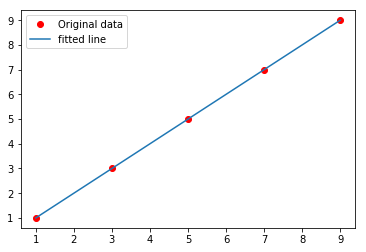

In [45]:

plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(ranX2, ranY, label='fitted line')
plt.legend()
plt.show()

In [46]:
# RMS Error
with tf.name_scope("Root_Mean_Square_Error"):
    rms=tf.sqrt(tf.reduce_mean(tf.squared_difference(x, y)))
    
    with tf.Session() as sess:
        print(sess.run(rms))

0.0
